In [158]:
import sys
#!{sys.executable} -m pip install plotly

# Wildfire Data Visualizations

## Dataset Information

In [159]:
#todo

## Library Imports

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_palette(sns.color_palette("Set1"))
sns.set_palette("pastel")
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action='ignore')

## EDA

In [18]:
df = pd.read_csv("climateAndFireTable.csv")

### *Spatial Representation of Fire Frequency and Temperature

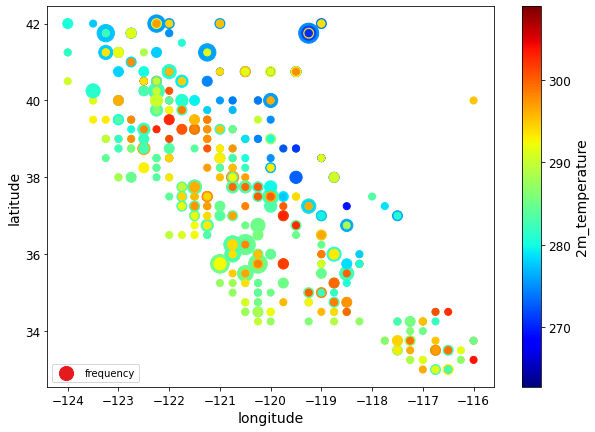

In [17]:
df.plot(kind="scatter", x="longitude", y="latitude",
             s=df["frequency"]*50, label="frequency", figsize=(10,7),
             c="2m_temperature", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

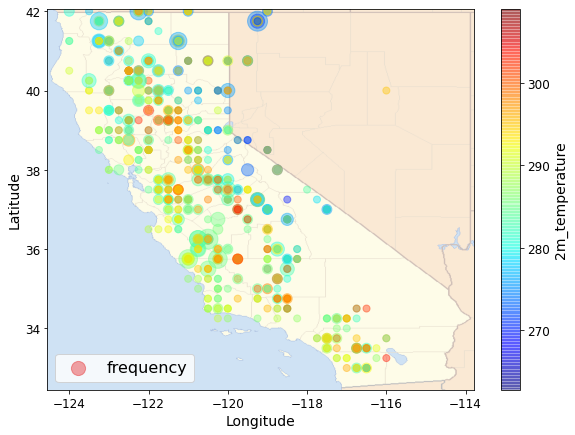

In [74]:
import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
ax = df.plot(kind="scatter", x="longitude", y="latitude",
                    s=df["frequency"]*50, label="frequency", figsize=(10,7), c="2m_temperature", 
                    cmap=plt.get_cmap("jet"), 
                    colorbar=True, sharex=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


plt.legend(fontsize=16)
plt.show()

Mid area seems to have a lot higher temperatures, but fires frequently are randomly everywhere (maybe high density populated area?)

#### df subsets and df exploratory

In [89]:
summer_df = df[(df['time'].str.slice(5,7) == '06') | (df['time'].str.slice(5,7) == '07') | (df['time'].str.slice(5,7) == '08')]

In [90]:
summer_df.head()

,latitude,longitude,time,city,county,year,frequency,2m_temperature,total_precipitation,low_vegetation_cover,high_vegetation_cover,10m_wind_speed,volumetric_soil_water_layer_1,total_cloud_cover
1945,34.50,-118.25,2013-06-01,Acton,Los Angeles County,2013,0,295.65470,0.000052,0.772771,0.154426,2.284202,0.080508,0.115681
1946,34.75,-117.50,2013-06-01,Adelanto,San Bernardino County,2013,0,300.22922,0.000025,1.000000,0.000000,4.228496,0.000266,0.122692
1947,33.50,-116.75,2013-06-01,Aguanga,Riverside County,2013,0,294.76323,0.000025,0.610029,0.389971,1.809325,0.106870,0.166436
1948,37.50,-119.75,2013-06-01,Ahwahnee,Madera County,2013,0,293.35007,0.000113,0.017045,0.982955,1.966331,0.237009,0.174306
1949,37.75,-122.25,2013-06-01,Alameda,Alameda County,2013,0,290.80310,0.000149,0.331802,0.112340,3.352046,0.087911,0.333267


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37344 entries, 0 to 37343
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       37344 non-null  float64
 1   longitude                      37344 non-null  float64
 2   time                           37344 non-null  object 
 3   city                           37344 non-null  object 
 4   county                         37344 non-null  object 
 5   year                           37344 non-null  int64  
 6   frequency                      37344 non-null  int64  
 7   2m_temperature                 37344 non-null  float64
 8   total_precipitation            37344 non-null  float64
 9   low_vegetation_cover           37344 non-null  float64
 10  high_vegetation_cover          37344 non-null  float64
 11  10m_wind_speed                 37344 non-null  float64
 12  volumetric_soil_water_layer_1  37344 non-null 

In [124]:
#for col in df.columns:
#  print(f"Column {col}", '\n', df[col].value_counts())
df['frequency'].value_counts()

0    36569
1      609
2      121
3       19
4       13
6        5
5        4
8        2
7        2
Name: frequency, dtype: int64

In [128]:
df['2m_temperature'].value_counts

<bound method IndexOpsMixin.value_counts of 0        280.579740
1        280.279000
2        281.126500
3        274.653780
4        281.011230
            ...    
37339    282.082640
37340    270.825558
37341    282.980400
37342    274.797665
37343    281.322690
Name: 2m_temperature, Length: 37344, dtype: float64>

In [129]:
print(df['2m_temperature'].max())
print(df['2m_temperature'].min())

308.9600000000001
262.7403513333333


In [131]:
print(summer_df['2m_temperature'].min())

285.2114087500001


### *Distribution of Frequency on Summer temperature

In [132]:
df['summer_temp'] = (df['2m_temperature'] >= 285).astype(int)
df['summer_temp'].value_counts()

1    25974
0    11370
Name: summer_temp, dtype: int64

In [136]:
df_2013 = df[df.year == 2013]
df_2014 = df[df.year == 2014]
df_2015 = df[df.year == 2015]
df_2016 = df[df.year == 2016]
df_2017 = df[df.year == 2017]
df_2018 = df[df.year == 2018]
df_2019 = df[df.year == 2019]
#df.loc[df['column_name'] != some_value]
#temp_2013 = df_2013.loc[(df_2013['longitude'] >= -120) & (df_2013['latitude'] >= 39)]
#temp_2013

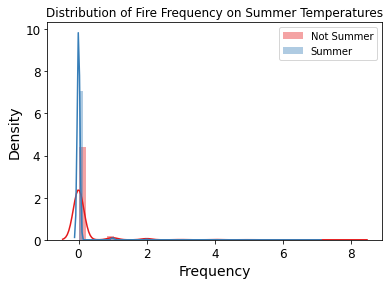

In [137]:
sns.distplot(df_2018[df_2018['summer_temp'] == 0]['frequency'], label='Not Summer')
sns.distplot(df_2018[df_2018['summer_temp'] == 1]['frequency'], label='Summer')
plt.title("Distribution of Fire Frequency on Summer Temperatures")
plt.xlabel("Frequency")
plt.ylabel('Density')
plt.legend();

In [138]:
df_2018_freq = df_2018[df_2018.frequency >= 2]

In [140]:
df_2018_freq.head()

,latitude,longitude,time,city,county,year,frequency,2m_temperature,total_precipitation,low_vegetation_cover,high_vegetation_cover,10m_wind_speed,volumetric_soil_water_layer_1,total_cloud_cover,summer_temp
23342,33.50,-116.75,2018-01-01,Aguanga,Riverside County,2018,2,285.939320,0.001319,0.610029,0.389971,1.822577,0.148321,0.563971,1
23343,37.50,-119.75,2018-01-01,Ahwahnee,Madera County,2018,2,279.231230,0.004113,0.017045,0.982955,1.657351,0.433880,0.649541,0
23349,41.75,-119.25,2018-01-01,Alturas,Modoc County,2018,8,274.796667,0.001783,0.879240,0.107612,2.430221,0.337100,0.791508,0
23356,35.25,-118.75,2018-01-01,Arvin,Kern County,2018,2,283.706000,0.001327,0.502800,0.497200,1.701467,0.242905,0.640910,0
23358,37.25,-119.25,2018-01-01,Auberry,Fresno County,2018,4,279.555133,0.003194,0.075733,0.924267,1.368556,0.393259,0.640515,0


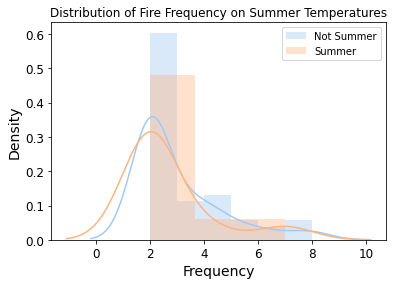

In [144]:
sns.distplot(df_2018_freq[df_2018_freq['summer_temp'] == 0]['frequency'], label='Not Summer')
sns.distplot(df_2018_freq[df_2018_freq['summer_temp'] == 1]['frequency'], label='Summer')
plt.title("Distribution of Fire Frequency on Summer Temperatures")
plt.xlabel("Frequency")
plt.ylabel('Density')
plt.legend();

The distribution of frequency on summer temperature is right skewed, as well as the frequency on not summer temperatures. The summer conditional distribution have modes at about 2-4. 

### *10m_wind_speed vs FireFreqs on Summer temperatures

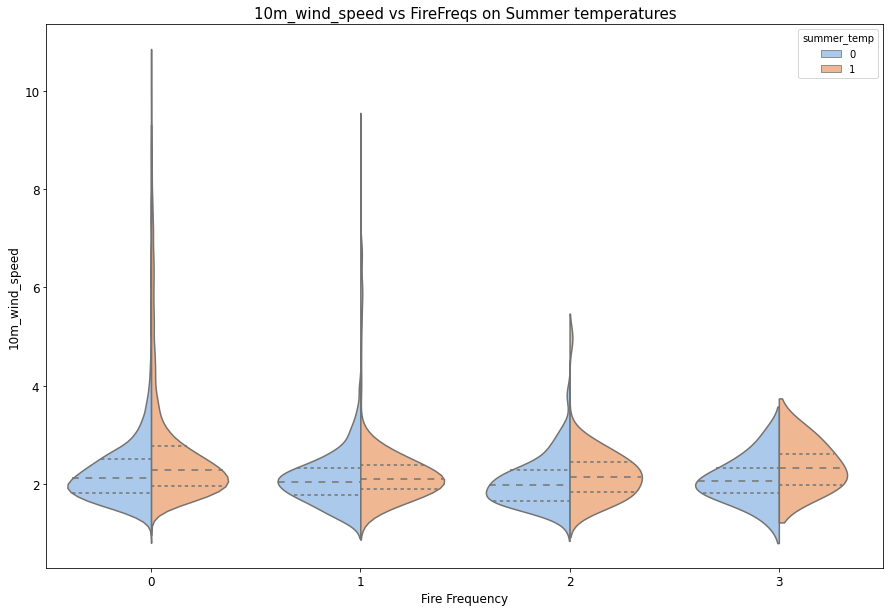

In [150]:
df_freq = df[df.frequency <=3]
plt.figure(figsize=(15, 10))
sns.violinplot(y='10m_wind_speed', x='frequency', data=df_freq, hue='summer_temp', split=True, inner='quartile')
plt.title("10m_wind_speed vs FireFreqs on Summer temperatures", fontsize=15)
plt.xlabel("Fire Frequency", fontsize=12)
plt.ylabel("10m_wind_speed",fontsize=12);

### *Heat map of correlations between features

<AxesSubplot:>

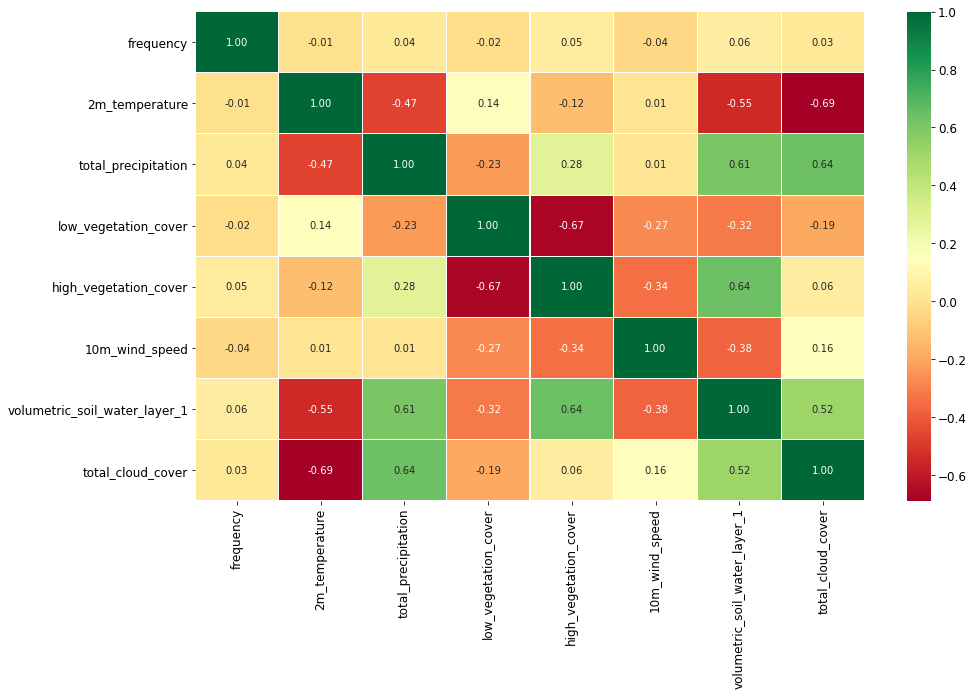

In [153]:
df_features = df[["frequency", "2m_temperature", "total_precipitation", "low_vegetation_cover", "high_vegetation_cover", "10m_wind_speed", "volumetric_soil_water_layer_1", "total_cloud_cover"]]
corr_matrix = df_features.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix, annot=True, linewidths=0.05, fmt= '.2f',cmap='RdYlGn')

### *Scatter matrix on highly correlated features based on heatmap

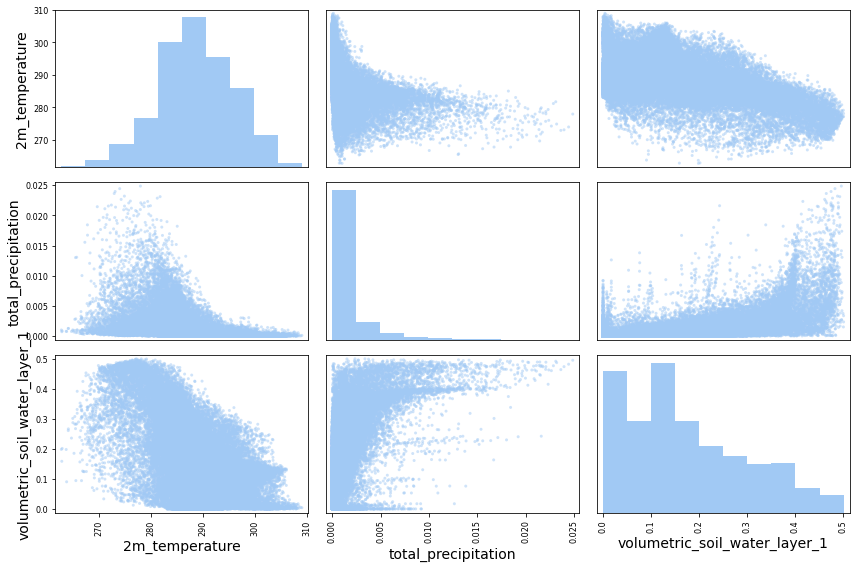

In [157]:
from pandas.plotting import scatter_matrix
attributes = ["2m_temperature", "total_precipitation", "volumetric_soil_water_layer_1"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.tight_layout()
plt.show()

 ### *more vis based on housing/population densities?